In [1]:
!pip install tweepy
!pip install vaderSentiment
!pip install twython


In [2]:
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import re
import nltk
import json
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
consumer_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
# find related tweets
tweets = api.search('Trump', count=1000)

In [5]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)
tweet = tweets[0]

1201477491543687168
2019-12-02 12:25:31
Twitter for Android
0
65
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'julia_otero', 'name': 'Julia Otero', 'id': 279649054, 'id_str': '279649054', 'indices': [3, 15]}], 'urls': []}


In [6]:
print(len(tweets))

100


In [7]:
print(tweet.text)

RT @julia_otero: Bloomberg, el nuevo rival demócrata de Trump, pone de su bolsillo el dinero que EEUU retiró para la Cumbre del Clima https…


In [8]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing links and special 
    characters using regex
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", 
                           " ", tweet).split())

In [9]:
# Create dataframe
data = pd.DataFrame(data=[clean_tweet(tweet.text) for tweet in tweets], columns = ['Tweets'])

display(data.head(10))

,Tweets
0,RT otero Bloomberg el nuevo rival dem crata de...
1,RT Last night on the ITV Leaders Debate I told...
2,RT 1 The details are also disputed and the evi...
3,RT Trump Economy Breaks Holiday Shopping Records
4,RT Trump s gaining support from Black voters a...
5,RT Donald Trump was framed back in 2016 100 co...
6,RT Like his colleague Rand Paul who experience...
7,It s really sad how those of us who have the c...
8,RT won t get the nomination Trump won t win St...
9,RT Alex Nunns Oh you know those leaked Trump t...


In [10]:
data.shape

(100, 1)

In [11]:
sid = SentimentIntensityAnalyzer()

def find_polarity(x):
    score = sid.polarity_scores(x)
    if score['pos'] >= 0.5:
        return 'positive'
    if score['neg'] >= 0.5:
        return 'negative'
    if score['neu'] >= 0.5:
        return 'neutral'


In [12]:

data['polarity'] = data['Tweets'].apply(find_polarity)


In [13]:
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
counts = len(data['polarity'].value_counts())
colors = colors[:counts]
explode = (0, 0, 0.1) if counts == 3 else (0, 0.1) if counts == 2 else (0, ) 

In [19]:
import matplotlib.pyplot as plt


In [ ]:

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

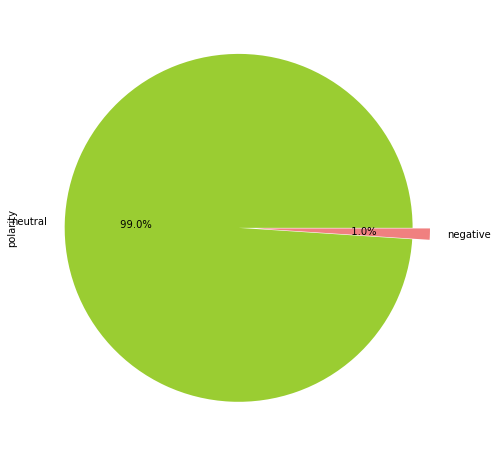

In [24]:

data['polarity'].value_counts().plot.pie(colors = colors, explode = explode, autopct='%5.1f%%', figsize = (8, 8))